In [139]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (5).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

#df1.columns=df1.columns.str.replace(' ','_')

df=dfs['Top3000_imdb_indian_movies']

df.columns=df.columns.str.replace(' ','_')
df['Date_of_Release']=df['Date_of_Release'].apply(lambda x: str(x))
#df[df.duplicated()]## Check duplicates
#sales_store.info()
#df.isnull().values.any() ########Check NUlls
#df.isnull().isnull().sum() ########Check NUlls by each column
#est=df[df['Date_of_Release']=='2021']
df=df.set_index(['Title', 'Date_of_Release','Crew_dir','Cast_stars','Plot_summary','Age_of_content','Votes','ImDBRating']).apply(lambda x: x.str.split(',').explode()).reset_index()
df=df.set_index(['Title', 'Date_of_Release','Genre','Cast_stars','Plot_summary','Age_of_content','Votes','ImDBRating']).apply(lambda x: x.str.split(',').explode()).reset_index()
df=df.set_index(['Title', 'Date_of_Release','Genre','Crew_dir','Plot_summary','Age_of_content','Votes','ImDBRating']).apply(lambda x: x.str.split(',').explode()).reset_index()
df['Genre']=df['Genre'].str.strip()
df['Crew_dir']=df['Crew_dir'].str.strip()
df['Cast_stars']=df['Cast_stars'].str.strip()

### Number of movies by Year by star

Akshay Kumar


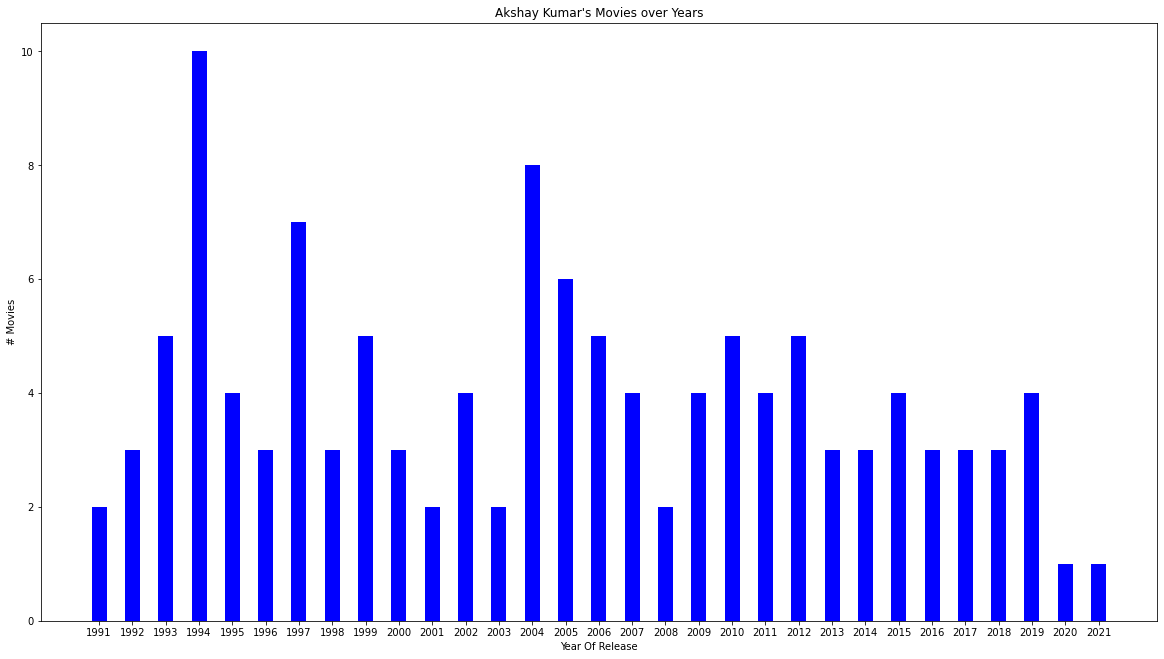

In [227]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 11)
fig.savefig('test2.png', dpi=100)

star=input()
test=pd.DataFrame(df[df['Cast_stars'].str.contains(f'{star}')]['Title'].groupby(df['Date_of_Release']).nunique())
test['Date_of_Release']=test.index
ax=plt.bar(test['Date_of_Release'].to_list(),height=test['Title'].to_list(),width=0.45,color='blue')
plt.xlabel('Year Of Release')
plt.ylabel('# Movies')
plt.title(f"{star}'s Movies over Years")
plt.show()
df[df['Cast_stars'].str.contains(f'{star}')].sort_values(by='Date_of_Release',ascending=True).to_excel(f'{star}.xlsx')

### Movies with Rating 8 and by Star

In [229]:
star=input()
test=pd.DataFrame(df[(df['Cast_stars'].str.contains(f'{star}'))&(df['ImDBRating']>=8)]['Title'])
test['Date_of_Release']=test.index
df2=df[df['Cast_stars'].str.contains(f'{star}')&(df['ImDBRating']>=8)].sort_values(by='Date_of_Release',ascending=True)
df2.to_excel(f'{star}.xlsx')
df2[['Title','Date_of_Release','Crew_dir','ImDBRating','Votes']].drop_duplicates().head(3)

Akshay Kumar


,Title,Date_of_Release,Crew_dir,ImDBRating,Votes
304,Hera Pheri,2000,Priyadarshan,8.2,61731
401,OMG: Oh My God!,2012,Umesh Shukla,8.1,54862
412,Special Chabbis,2013,Neeraj Pandey,8.0,53541


In [214]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 11)
fig.savefig('test2.png', dpi=100)

star=input()
test=pd.DataFrame(df[df['Cast_stars'].str.contains(f'{star}')]['Title'].groupby(df['Date_of_Release']).nunique())
test['Date_of_Release']=test.index
ax=plt.bar(test['Date_of_Release'].to_list(),height=test['Title'].to_list(),width=0.45,color='blue')
plt.xlabel('Year Of Release')
plt.ylabel('# Movies')
plt.title(f"{star}'s Movies over Years")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30881 entries, 0 to 30880
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            30881 non-null  object 
 1   Date_of_Release  30881 non-null  object 
 2   Genre            30881 non-null  object 
 3   Crew_dir         30851 non-null  object 
 4   Plot_summary     30881 non-null  object 
 5   Age_of_content   30881 non-null  int64  
 6   Votes            30881 non-null  int64  
 7   ImDBRating       30881 non-null  float64
 8   Cast_stars       30881 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB
